In [3]:
import pyvista as pv
import numpy as np

filename = 'CaseRZ_FlowCylinder3D_out/particles/PartFluid_0090.vtk'
mesh = pv.read(filename)

# note that we have 6 Data Arrays
mesh


PolyData (0x7f29eebe3a60)
  N Cells:	20019
  N Points:	20019
  X Bounds:	-1.049e+00, 1.029e+00
  Y Bounds:	-9.907e-01, 9.746e-01
  Z Bounds:	-9.975e-01, 1.148e+00
  N Arrays:	6

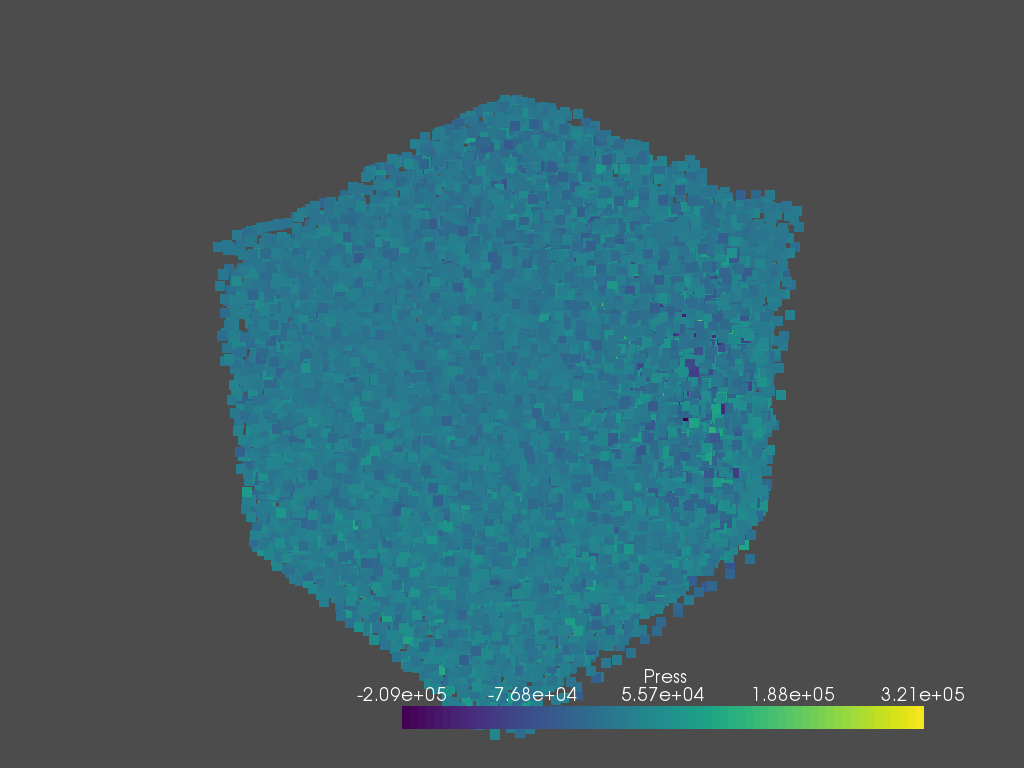

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [4]:
mesh.set_active_scalars('Press')
mesh.plot(point_size=10)

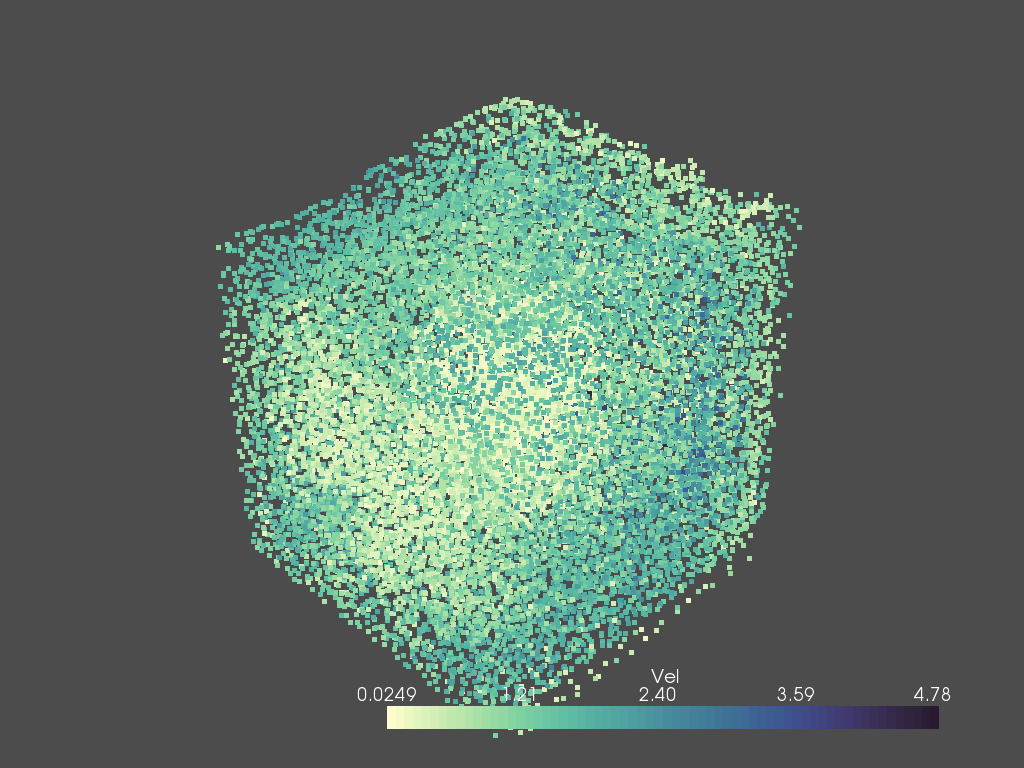

ERROR:root:The interactor must be set prior to enabling/disabling widget


Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [28]:
# mesh.plot(point_size=10)
import matplotlib.pyplot as plt


# pl = pv.PlotterITK()

# the below does not seem to be the right way to set for plotting
mesh.set_active_scalars('Vel')


boring_cmap = plt.cm.get_cmap("cmo.deep", 255)

mesh.plot(cmap=boring_cmap)



pl = pv.PlotterITK()

#plotting Press to a scalar(s) doesn't work either
pl.add_mesh(mesh)
pl.show(True)

In [32]:
sized = mesh.compute_cell_sizes()
cell_volumes = sized.cell_arrays["Volume"]
volume = mesh.volume

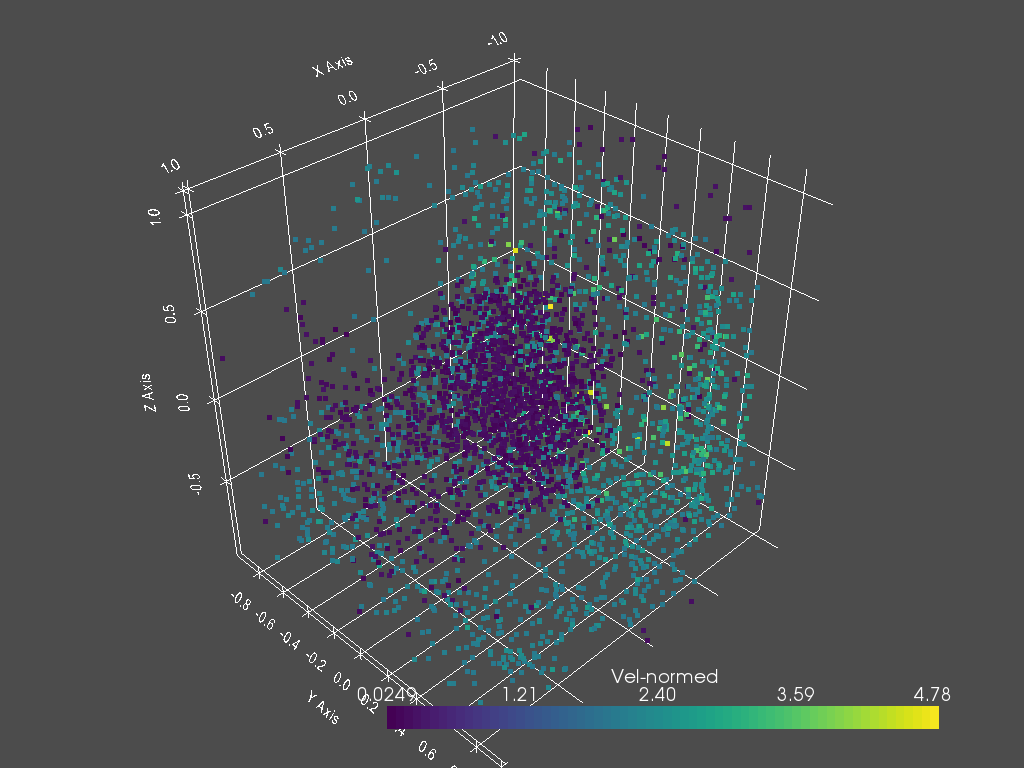

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [48]:
threshed = mesh.threshold_percent([0.05, 0.40], invert=True)
threshed.plot(show_grid=True, cpos=[1,1,1])

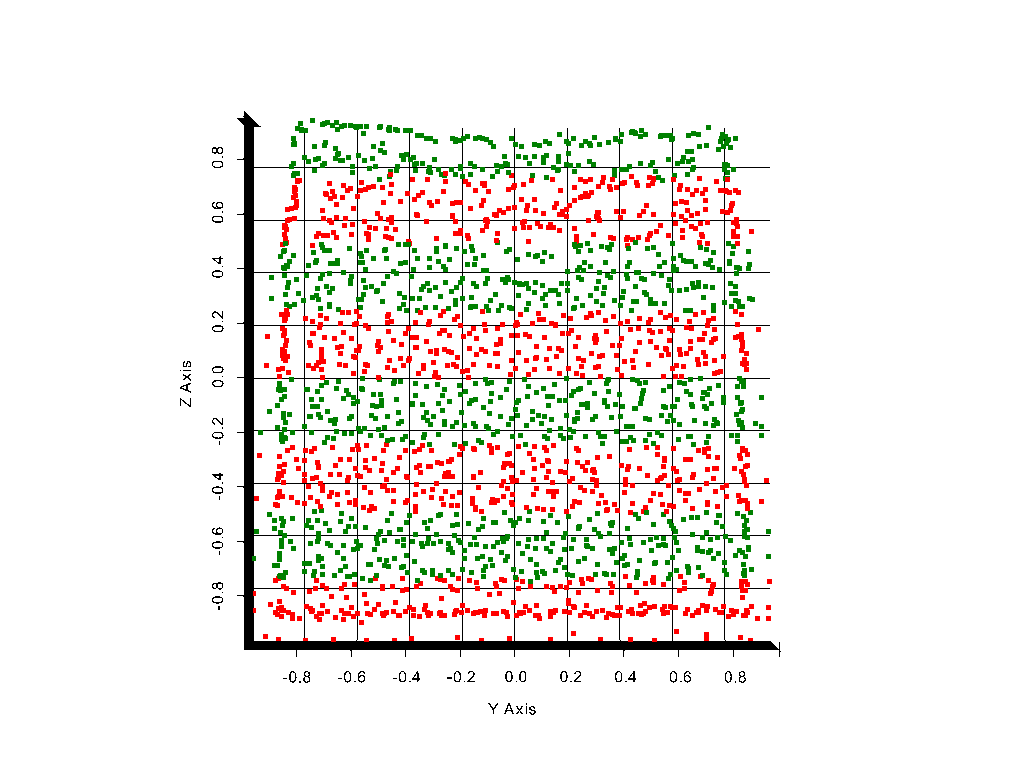

In [217]:
import cmocean
s_res = 8
p = pv.Plotter()
# p.add_mesh(mesh,color='blue', label='Input')
cmaps = cmocean.cm.algae
# print(cmaps.colors)
ii = 0

for j in np.arange(s_res):
    for k in np.arange(s_res):
        ii +=1
        colors = cmaps(ii*10)
#         print(colors)
        y = ((j/s_res)*2)-1
        z = ((k/s_res)*2)-1
        bounds = [0.8,1 , y,y+2/s_res, z,z+2/s_res]
        clipped = mesh.clip_box(bounds,invert=False)
        if  k % 2  == 0:
            p.add_mesh(clipped, label='Clipped',color='red')
        else:
            p.add_mesh(clipped, label='Clipped',color='green')


p.show_grid()
p.show(cpos=[1,0,0])



In [223]:
# make 64 sensors and compute some stuff
ii = 0

for j in np.arange(s_res):
    for k in np.arange(s_res):
        ii +=1
        y = ((j/s_res)*2)-1
        z = ((k/s_res)*2)-1
        bounds = [0.8,1 , y,y+2/s_res, z,z+2/s_res]
        clipped = mesh.clip_box(bounds,invert=False)
        print(ii,clipped['Vel-normed'].mean(),clipped['Vel-normed'].std(),clipped['Vel-normed'].size)




1 1.1181122 0.37990952 28
2 1.2963353 0.4280589 34
3 1.361268 0.38341025 32
4 1.1932993 0.3360852 32
5 1.1358559 0.27036953 34
6 1.117042 0.23071416 26
7 1.324938 0.18918453 26
8 1.4901986 0.18663007 18
9 1.3752087 0.41311982 36
10 1.6552494 0.38547376 46
11 1.1823573 0.39771184 44
12 0.902989 0.45302412 43
13 0.8762407 0.40710068 44
14 0.99305904 0.37132633 45
15 1.1764265 0.41379955 41
16 1.548414 0.166334 40
17 1.2304788 0.39168176 34
18 1.222802 0.3353107 41
19 1.1661679 0.37782893 43
20 0.5675578 0.27071378 38
21 0.42005792 0.15190497 42
22 0.4461852 0.18980531 44
23 0.7979491 0.32647485 33
24 1.2120098 0.38270137 34
25 1.3534888 0.39762363 35
26 0.86963207 0.27139336 46
27 0.7407515 0.3303352 48
28 0.5655267 0.30001175 36
29 0.36430487 0.15979476 37
30 0.48979732 0.2405079 43
31 0.79916537 0.25861657 38
32 1.2854027 0.24362998 32
33 1.2721252 0.44700274 36
34 0.93604654 0.42603332 43
35 0.46627158 0.21412392 40
36 0.4222055 0.2065234 43
37 0.35362563 0.13692278 42
38 0.48839283 0

In [100]:
clipped['Vel'].mean(),clipped['Vel'].std(),clipped['Vel'].size

(0.077235974, 0.23970848, 75)

In [152]:
geom = pv.Arrow()  # This could be any dataset

# Perform the glyph
# mesh.set_active_scalar('Vel')


# mesh.set_active_vectors('Vel')

bounds = [-1,1 , -.1,.1 , -1,1]
# mesh2 = mesh.gaussian_smooth(std_dev=2.)
clipped2 = mesh.clip_box(bounds,invert=False)

glyphs = clipped2.glyph(orient="Vel",scale="Vel-normed", factor=0.1, geom=geom)

# plot using the plotting class
pv.set_plot_theme("document")

p = pv.Plotter()
p.add_mesh(glyphs,lighting=True)
# Set a cool camera position
# p.camera_position = [
#     (84.58052237950857, 77.76332116787425, 27.208569926456548),
#     (131.39486171068918, 99.871379394528, 20.082859824932008),
#     (0.13483731007732908, 0.033663777790747404, 0.9902957385932576),
# # ]
p.show_grid()
p.show(cpos=[0,1,0])

NameError: name 'x' is not defined

In [173]:
# can't seem to get stream lines working
# https://docs.pyvista.org/examples/01-filter/streamlines.html#sphx-glr-examples-01-filter-streamlines-py
mesh.set_active_scalars("Vel-normed")
mesh.set_active_vectors("Vel")
streamlines, src = mesh.streamlines(
    return_source=True,
    max_time=100.0,
    initial_step_length=0.01,
    terminal_speed=0.1,
    n_points=50,
    source_radius=0.1,
    source_center=(0,0,0),
)
# p = pv.Plotter()
# p.add_mesh(src.tube(radius=0.01), scalars="Vel-normed", lighting=False)
# p.show()
streamlines
# src


PolyData (0x7f29d5f5c8a0)
  N Cells:	0
  N Points:	0
  X Bounds:	1.000e+00, -1.000e+00
  Y Bounds:	1.000e+00, -1.000e+00
  Z Bounds:	1.000e+00, -1.000e+00
  N Arrays:	11

In [60]:
channels = mesh.threshold([1.5,4])
bodies = channels.split_bodies()
# Now remove all bodies with a small volume
for key in bodies.keys():
    b = bodies[key]
    vol = b.volume
#     if vol < 1000.0:
#         del bodies[key]
#         continue
    # Now lets add a volume array to all blocks
    b.cell_arrays["TOTAL VOLUME"] = np.full(b.n_cells, vol)

KeyboardInterrupt: 

In [ ]:
bodies.plot(scalars="TOTAL VOLUME", cmap="viridis", show_grid=True)


In [4]:

pl = pv.PlotterITK()

# the below does not seem to be the right way to set for plotting
mesh.set_active_vectors('Press')



pl = pv.PlotterITK()

#plotting Press to a scalar(s) doesn't work either
pl.add_mesh(mesh, scalar = mesh['Press'],smooth_shading=True)
pl.show(True)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…